In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

plt.style.use('fivethirtyeight')
pd.options.display.max_rows = 500
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

fred_key = '107cd96453382eeb5bab6ff9b8a22010'

# Create the Fred object

In [2]:
fred = Fred(fred_key)

In [3]:
sp_search = fred.search('S&P', order_by='popularity')

In [4]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-06-10   2024-06-10   
CSUSHPINSA          CSUSHPINSA     2024-06-10   2024-06-10   
SP500                    SP500     2024-06-10   2024-06-10   
MEHOINUSA672N    MEHOINUSA672N     2024-06-10   2024-06-10   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-06-10   2024-06-10   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-06-07  Daily, Close   
CSUSHPINSA            1987-01-01      2024-03-01       Monthly   
SP500                 2014-06-09      2024-06-06  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-06-07  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-06-10 08:56:13-05:00   
CSUSHPINSA                           NSA  2024-05-28 08:11:02-05:00   
SP500                                NSA  2024-06-07 13:36:58-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-06-10 08:56:16-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# Pull raw data

In [5]:
sp500 = fred.get_series(series_id='SP500')

In [6]:
sp500

2014-06-09    1951.27
2014-06-10    1950.79
2014-06-11    1943.89
2014-06-12    1930.11
2014-06-13    1936.16
               ...   
2024-05-31    5277.51
2024-06-03    5283.40
2024-06-04    5291.34
2024-06-05    5354.03
2024-06-06    5352.96
Length: 2609, dtype: float64

<Axes: title={'center': 'S&P 500'}>

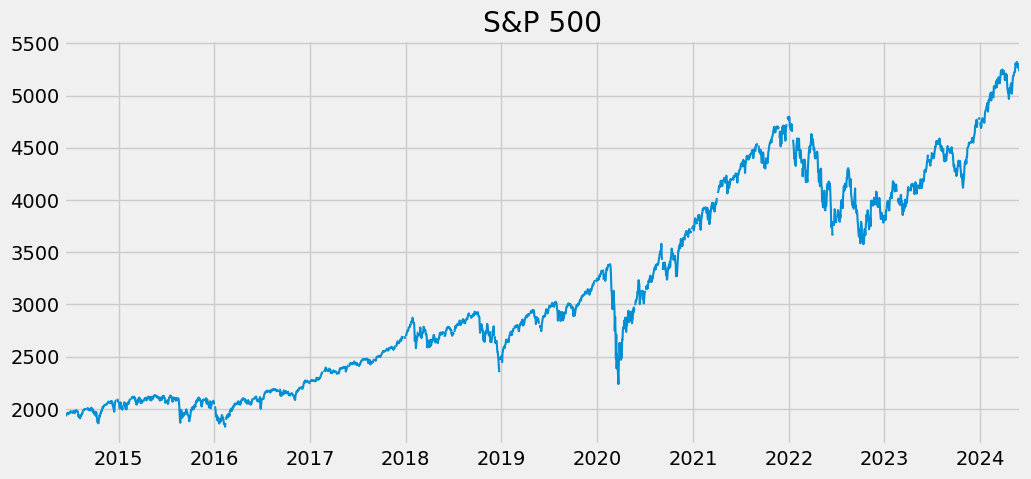

In [7]:
sp500.plot(figsize=(11,5), title='S&P 500', lw=1.5)

# Join multiple series

In [8]:
unemp_results = fred.search('unemployment')

In [9]:
unemp_results[pd.DatetimeIndex(unemp_results['realtime_end']).year ==2024]

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-06-10   2024-06-10   
UNRATENSA                          UNRATENSA     2024-06-10   2024-06-10   
UNEMPLOY                            UNEMPLOY     2024-06-10   2024-06-10   
NROU                                    NROU     2024-06-10   2024-06-10   
CCSA                                    CCSA     2024-06-10   2024-06-10   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-06-10   2024-06-10   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-06-10   2024-06-10   
LNS14000315                      LNS14000315     2024-06-10   2024-06-10   
LNU04032222                      LNU04032222     2024-06-10   2024-06-10   
LNU04032223                      LNU04032223     2024-06-10   2024-06-10   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-05-01   
UNRATENSA                    1948-01-01      2024-05-01   
UNEMPLOY                     1948-01-01      2024-05-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-05-25   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-05-01   
LNU04032222                  2000-01-01      2024-05-01   
LNU04032223                  2000-01-01      2024-05-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [10]:
unrate = fred.get_series('UNRATE')

In [11]:
unrate = unrate[pd.DatetimeIndex(unrate.index).year > 2013]

<Axes: title={'center': 'Unemployment rate by year'}>

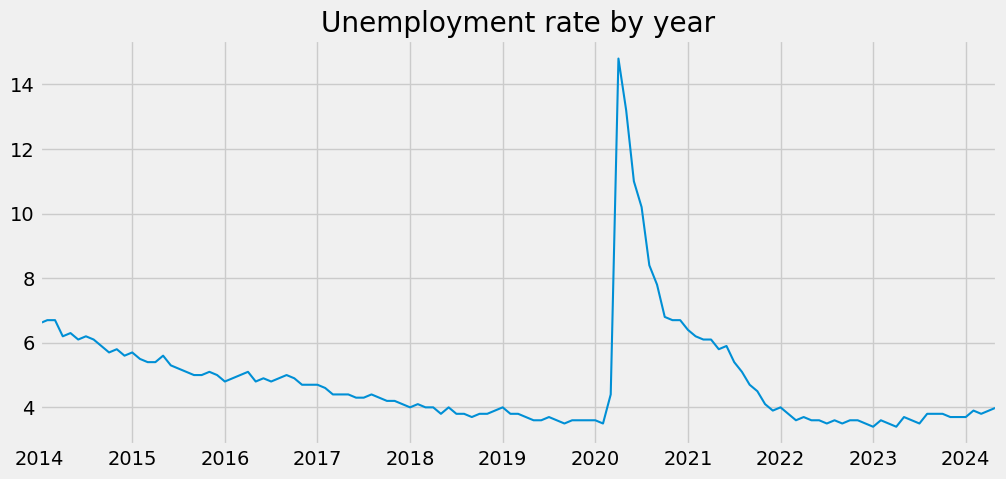

In [12]:
unrate.plot(figsize=(11,5), title='Unemployment rate by year', lw=1.5)

In [13]:
unemp_state = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [14]:
unemp_state

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-06-10   2024-06-10   
UNRATENSA      UNRATENSA     2024-06-10   2024-06-10   
LNS14000006  LNS14000006     2024-06-10   2024-06-10   
UNEMPLOY        UNEMPLOY     2024-06-10   2024-06-10   
LNU04000006  LNU04000006     2024-06-10   2024-06-10   
...                  ...            ...          ...   
LNU04032220  LNU04032220     2024-06-10   2024-06-10   
SCMARI7URN    SCMARI7URN     2024-06-10   2024-06-10   
VAALBE7URN    VAALBE7URN     2024-06-10   2024-06-10   
HAGE124UR      HAGE124UR     2024-06-10   2024-06-10   
MIINGH5URN    MIINGH5URN     2024-06-10   2024-06-10   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LNU04032220  Unemployment Rate - Sales and Related Occupations   
SCMARI7URN              Unemployment Rate in Marion County, SC   
VAALBE7URN           Unemployment Rate in Albemarle County, VA   
HAGE124UR    Unemployment Rate in Hagerstown-Martinsburg, M...   
MIINGH5URN              Unemployment Rate in Ingham County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-05-01   Monthly               M   
UNRATENSA          1948-01-01      2024-05-01   Monthly               M   
LNS14000006        1972-01-01      2024-05-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-05-01   Monthly               M   
LNU04000006        1972-01-01      2024-05-01   Monthly               M   
...                       ...             ...       ...             ...   
LNU04032220        2000-01-01      2024-05-01   Monthly               M   
SCMARI7URN         1990-01-01      2024-04-01   Monthly               M   
VAALBE7URN         1990-01-01      2024-04-01   Monthly               M   
HAGE124UR          1990-01-01      2024-04-01   Monthly               M   
MIINGH5URN         1990-01-01      2024-04-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU04000006               Percent                  %   
...                           ...                ...   
LNU04032220               Percent                  %   
SCMARI7URN                Percent                  %   
VAALBE7URN                Percent                  %   
HAGE124UR                 Percent                  %   
MIINGH5URN                Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU04000006       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
LNU04032220       Not Seasonally Adjusted                       NSA   
SCMARI7URN        Not Seasonally Adjusted                       NSA   
VAALBE7URN        N

In [15]:
unemp_state = unemp_state.query('units == "Percent" and seasonal_adjustment == "Seasonally Adjusted"')
unemp_state = unemp_state.loc[unemp_state['title'].str.contains('Unemployment Rate')]

In [16]:
unemp_state = unemp_state[unemp_state.index.str.len() <= 6]

In [17]:
unemp_state

id realtime_start realtime_end  \
series id                                       
UNRATE     UNRATE     2024-06-10   2024-06-10   
CAUR         CAUR     2024-06-10   2024-06-10   
TXUR         TXUR     2024-06-10   2024-06-10   
NYUR         NYUR     2024-06-10   2024-06-10   
U2RATE     U2RATE     2024-06-10   2024-06-10   
FLUR         FLUR     2024-06-10   2024-06-10   
PAUR         PAUR     2024-06-10   2024-06-10   
OHUR         OHUR     2024-06-10   2024-06-10   
MIUR         MIUR     2024-06-10   2024-06-10   
ALUR         ALUR     2024-06-10   2024-06-10   
MAUR         MAUR     2024-06-10   2024-06-10   
NCUR         NCUR     2024-06-10   2024-06-10   
ILUR         ILUR     2024-06-10   2024-06-10   
NJUR         NJUR     2024-06-10   2024-06-10   
GAUR         GAUR     2024-06-10   2024-06-10   
COUR         COUR     2024-06-10   2024-06-10   
AZUR         AZUR     2024-06-10   2024-06-10   
WIUR         WIUR     2024-06-10   2024-06-10   
VAUR         VAUR     2024-06-10   2024-06-10   
KYUR         KYUR     2024-06-10   2024-06-10   
SCUR         SCUR     2024-06-10   2024-06-10   
NMUR         NMUR     2024-06-10   2024-06-10   
MNUR         MNUR     2024-06-10   2024-06-10   
TNUR         TNUR     2024-06-10   2024-06-10   
WAUR         WAUR     2024-06-10   2024-06-10   
MDUR         MDUR     2024-06-10   2024-06-10   
ORUR         ORUR     2024-06-10   2024-06-10   
WVUR         WVUR     2024-06-10   2024-06-10   
NVUR         NVUR     2024-06-10   2024-06-10   
ARUR         ARUR     2024-06-10   2024-06-10   
OKUR         OKUR     2024-06-10   2024-06-10   
MOUR         MOUR     2024-06-10   2024-06-10   
AKUR         AKUR     2024-06-10   2024-06-10   
IAUR         IAUR     2024-06-10   2024-06-10   
UTUR         UTUR     2024-06-10   2024-06-10   
PRUR         PRUR     2024-06-10   2024-06-10   
INUR         INUR     2024-06-10   2024-06-10   
LAUR         LAUR     2024-06-10   2024-06-10   
HIUR         HIUR     2024-06-10   2024-06-10   
NDUR         NDUR     2024-06-10   2024-06-10   
MTUR         MTUR     2024-06-10   2024-06-10   
DCUR         DCUR     2024-06-10   2024-06-10   
MSUR         MSUR     2024-06-10   2024-06-10   
MEUR         MEUR     2024-06-10   2024-06-10   
NEUR         NEUR     2024-06-10   2024-06-10   
CTUR         CTUR     2024-06-10   2024-06-10   
IDUR         IDUR     2024-06-10   2024-06-10   
NHUR         NHUR     2024-06-10   2024-06-10   
RIUR         RIUR     2024-06-10   2024-06-10   
KSUR         KSUR     2024-06-10   2024-06-10   
WYUR         WYUR     2024-06-10   2024-06-10   
DEUR         DEUR     2024-06-10   2024-06-10   
VTUR         VTUR     2024-06-10   2024-06-10   
SDUR         SDUR     2024-06-10   2024-06-10   
CMWRUR     CMWRUR     2024-06-10   2024-06-10   
CSOUUR     CSOUUR     2024-06-10   2024-06-10   
CNERUR     CNERUR     2024-06-10   2024-06-10   
CWSTUR     CWSTUR     2024-06-10   2024-06-10   
CNEWUR     CNEWUR     2024-06-10   2024-06-10   

                                                      title observation_start  \
series id                                                                       
UNRATE                                    Unemployment Rate        1948-01-01   
CAUR                        Unemployment Rate in California        1976-01-01   
TXUR                             Unemployment Rate in Texas        1976-01-01   
NYUR                          Unemployment Rate in New York        1976-01-01   
U2RATE                 Unemployment Rate - Job Losers (U-2)        1967-01-01   
FLUR                           Unemployment Rate in Florida        1976-01-01   
PAUR                      Unemployment Rate in Pennsylvania        1976-01-01   
OHUR                              Unemployment Rate in Ohio        1976-01-01   
MIUR                          Unemployment Rate in Michigan        1976-01-01   
ALUR                           Unemployment Rate in Alabama        1976-01-01   
MAUR                     Unemployment Rate in Massach

In [18]:
results = []
for series_id in unemp_state.index:
    res = fred.get_series(series_id=series_id)
    res = res.to_frame(name=series_id)
    results.append(res)
unemp_results = pd.concat(results, axis=1)

In [19]:
unemp_results.drop(['UNRATE', 'PRUR', 'CNEWUR', 'CWSTUR', 'CNERUR', 'CSOUUR', 'CMWRUR', 'U2RATE'], axis=1, inplace=True)
states_names = unemp_state['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_results.columns = [states_names[state] for state in unemp_results.columns]

In [20]:
unemp_results

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1948-01-01         NaN    NaN       NaN      NaN           NaN   NaN   
1948-02-01         NaN    NaN       NaN      NaN           NaN   NaN   
1948-03-01         NaN    NaN       NaN      NaN           NaN   NaN   
1948-04-01         NaN    NaN       NaN      NaN           NaN   NaN   
1948-05-01         NaN    NaN       NaN      NaN           NaN   NaN   
...                ...    ...       ...      ...           ...   ...   
2024-01-01         5.2    3.9       4.5      3.1           3.4   3.7   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         NaN    NaN       NaN      NaN           NaN   NaN   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Nebraska  \
1948-01-01       NaN      NaN            NaN             NaN  ...       NaN   
1948-02-01       NaN      NaN            NaN             NaN  ...       NaN   
1948-03-01       NaN      NaN            NaN             NaN  ...       NaN   
1948-04-01       NaN      NaN            NaN             NaN  ...       NaN   
1948-05-01       NaN      NaN            NaN             NaN  ...       NaN   
...              ...      ...            ...             ...  ...       ...   
2024-01-01       4.0      2.9            3.0             3.5  ...       2.5   
2024-02-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-03-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-04-01       3.9      3.1            2.9             3.5  ...       2.5   
2024-05-01       NaN      NaN            NaN             NaN  ...       NaN   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1948-01-01          NaN    NaN            NaN           NaN     NaN      NaN   
1948-02-01          NaN    NaN            NaN           NaN     NaN      NaN   
1948-03-01          NaN    NaN            NaN           NaN     NaN      NaN   
1948-04-01          NaN    NaN            NaN           NaN     NaN      NaN   
1948-05-01          NaN    NaN            NaN           NaN     NaN      NaN   
...                 ...    ...            ...           ...     ...      ...   
2024-01-01          4.4    3.3            2.6           3.6     2.6      2.8   
2024-02-01          4.5    3.3            2.6           3.9     2.7      2.8   
2024-03-01          4.5    3.3            2.6           4.1     2.7      2.8   
2024-04-01          4.4    3.3            2.6           4.1     2.8      2.8   
2024-05-01          NaN    NaN            NaN           NaN     NaN      NaN   

            Delaware  Vermont  South Dakota  
1948-01-01       NaN      NaN           NaN  
1948-02-01       NaN      NaN           NaN  
1948-03-01       NaN      NaN           NaN  
1948-04-01       NaN      NaN           NaN  
1948-05-01       NaN      NaN           NaN  
...              ...      ...           ...  
2024-01-01       4.1      2.3           2.1  
2024-02-01       4.0      2.3           2.1  
2024-03-01       3.9      2.2           2.1  
2024-04-01       3.9      2.1           2.0  
2024-05-01       NaN      NaN           NaN  

[917 rows x 51 columns]

<Axes: >

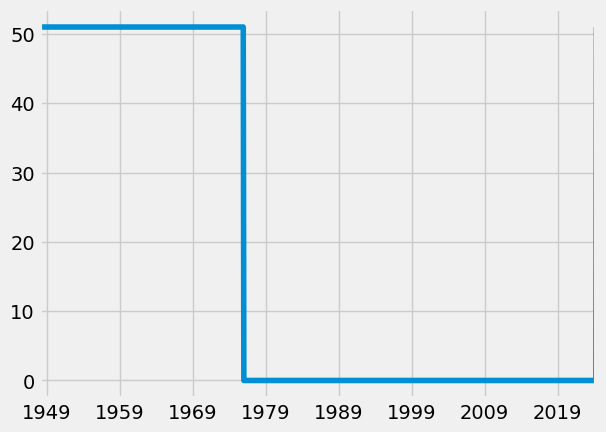

In [21]:
unemp_results.isna().sum(axis=1).plot()

In [22]:
unemp_results.dropna(inplace=True)

In [23]:
unemp_results

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2023-12-01         5.1    3.9       4.6      3.1           3.4   3.6   
2024-01-01         5.2    3.9       4.5      3.1           3.4   3.7   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Nebraska  \
1976-01-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-02-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-03-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-04-01       9.8      6.5           10.3             6.3  ...       3.2   
1976-05-01       9.6      6.4           10.1             6.1  ...       3.1   
...              ...      ...            ...             ...  ...       ...   
2023-12-01       4.1      2.8            3.2             3.6  ...       2.5   
2024-01-01       4.0      2.9            3.0             3.5  ...       2.5   
2024-02-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-03-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-04-01       3.9      3.1            2.9             3.5  ...       2.5   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1976-01-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-02-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-03-01          9.8    5.6            6.5           7.7     4.2      4.1   
1976-04-01          9.6    5.6            6.5           7.7     4.2      4.0   
1976-05-01          9.4    5.6            6.5           7.7     4.2      3.9   
...                 ...    ...            ...           ...     ...      ...   
2023-12-01          4.2    3.3            2.6           3.4     2.6      2.9   
2024-01-01          4.4    3.3            2.6           3.6     2.6      2.8   
2024-02-01          4.5    3.3            2.6           3.9     2.7      2.8   
2024-03-01          4.5    3.3            2.6           4.1     2.7      2.8   
2024-04-01          4.4    3.3            2.6           4.1     2.8      2.8   

            Delaware  Vermont  South Dakota  
1976-01-01       8.0      8.6           3.3  
1976-02-01       8.0      8.6           3.3  
1976-03-01       8.0      8.6           3.2  
1976-04-01       8.1      8.6           3.1  
1976-05-01       8.3      8.5           3.1  
...              ...      ...           ...  
2023-12-01       4.1      2.3           2.1  
2024-01-01       4.1      2.3           2.1  
2024-02-01       4.0      2.3           2.1  
2024-03-01       3.9      2.2           2.1  
2024-04-01       3.9      2.1           2.0  

[580 rows x 51 columns]

In [24]:
from dash_bootstrap_templates import load_figure_template
load_figure_template('darkly')

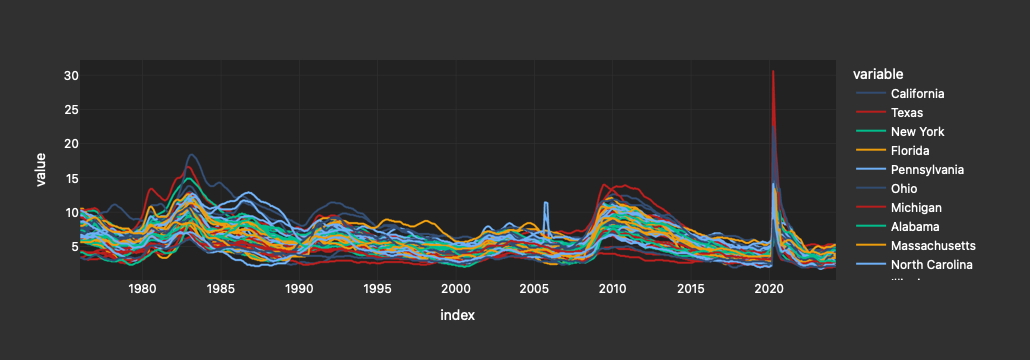

In [25]:
px.line(unemp_results)

# April unemployment rate per state

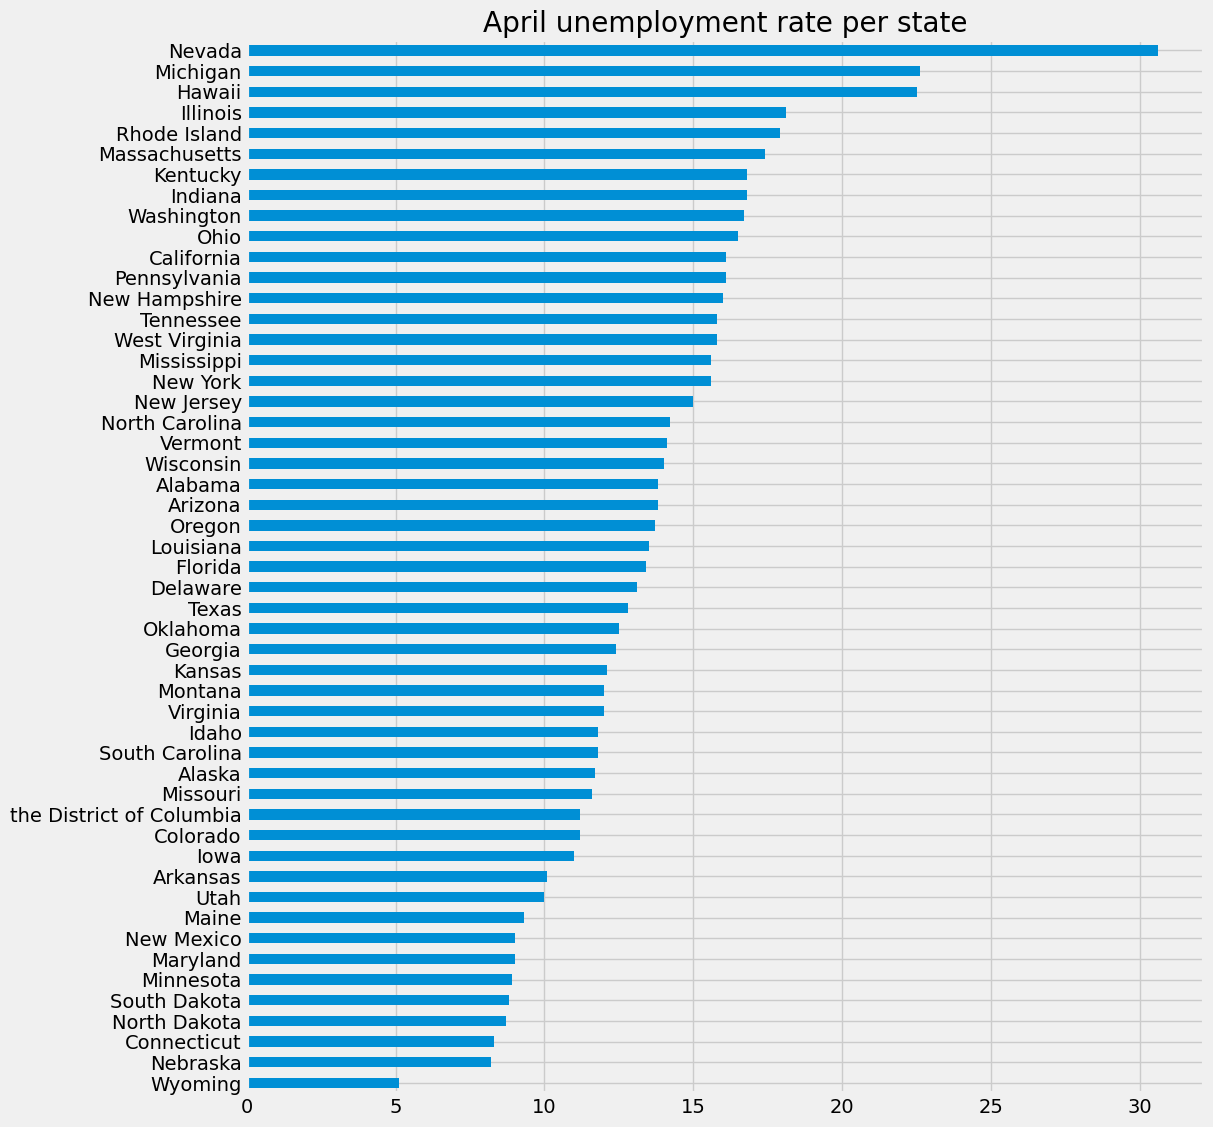

In [26]:
covid_laid_off_chart = unemp_results.loc[unemp_results.index=='2020-04-01'].T \
                                    .sort_values('2020-04-01') \
                                    .plot(kind='barh', figsize=(11,13), title='April unemployment rate per state')

covid_laid_off_chart.legend().remove()

# Participation rate

In [45]:
prtcp_df = fred.search('Participation rate', filter=('frequency', 'Monthly'))
prtcp_df = prtcp_df.query('units == "Percent" and seasonal_adjustment == "Seasonally Adjusted"')
prtcp_df = prtcp_df[prtcp_df['title'].str.contains('Labor Force Participation Rate for ')]

In [46]:
prtcp_df.shape

(51, 15)

In [47]:
prtcp_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-06-10   2024-06-10   
LBSSA01    LBSSA01     2024-06-10   2024-06-10   
LBSSA36    LBSSA36     2024-06-10   2024-06-10   
LBSSA28    LBSSA28     2024-06-10   2024-06-10   
LBSSA26    LBSSA26     2024-06-10   2024-06-10   
LBSSA48    LBSSA48     2024-06-10   2024-06-10   
LBSSA12    LBSSA12     2024-06-10   2024-06-10   
LBSSA21    LBSSA21     2024-06-10   2024-06-10   
LBSSA39    LBSSA39     2024-06-10   2024-06-10   
LBSSA55    LBSSA55     2024-06-10   2024-06-10   
LBSSA42    LBSSA42     2024-06-10   2024-06-10   
LBSSA25    LBSSA25     2024-06-10   2024-06-10   
LBSSA27    LBSSA27     2024-06-10   2024-06-10   
LBSSA24    LBSSA24     2024-06-10   2024-06-10   
LBSSA54    LBSSA54     2024-06-10   2024-06-10   
LBSSA47    LBSSA47     2024-06-10   2024-06-10   
LBSSA23    LBSSA23     2024-06-10   2024-06-10   
LBSSA22    LBSSA22     2024-06-10   2024-06-10   
LBSSA17    LBSSA17     2024-06-10   2024-06-10   
LBSSA45    LBSSA45     2024-06-10   2024-06-10   
LBSSA08    LBSSA08     2024-06-10   2024-06-10   
LBSSA37    LBSSA37     2024-06-10   2024-06-10   
LBSSA13    LBSSA13     2024-06-10   2024-06-10   
LBSSA49    LBSSA49     2024-06-10   2024-06-10   
LBSSA18    LBSSA18     2024-06-10   2024-06-10   
LBSSA29    LBSSA29     2024-06-10   2024-06-10   
LBSSA51    LBSSA51     2024-06-10   2024-06-10   
LBSSA34    LBSSA34     2024-06-10   2024-06-10   
LBSSA19    LBSSA19     2024-06-10   2024-06-10   
LBSSA02    LBSSA02     2024-06-10   2024-06-10   
LBSSA53    LBSSA53     2024-06-10   2024-06-10   
LBSSA04    LBSSA04     2024-06-10   2024-06-10   
LBSSA35    LBSSA35     2024-06-10   2024-06-10   
LBSSA16    LBSSA16     2024-06-10   2024-06-10   
LBSSA05    LBSSA05     2024-06-10   2024-06-10   
LBSSA40    LBSSA40     2024-06-10   2024-06-10   
LBSSA31    LBSSA31     2024-06-10   2024-06-10   
LBSSA15    LBSSA15     2024-06-10   2024-06-10   
LBSSA32    LBSSA32     2024-06-10   2024-06-10   
LBSSA30    LBSSA30     2024-06-10   2024-06-10   
LBSSA41    LBSSA41     2024-06-10   2024-06-10   
LBSSA33    LBSSA33     2024-06-10   2024-06-10   
LBSSA50    LBSSA50     2024-06-10   2024-06-10   
LBSSA09    LBSSA09     2024-06-10   2024-06-10   
LBSSA38    LBSSA38     2024-06-10   2024-06-10   
LBSSA46    LBSSA46     2024-06-10   2024-06-10   
LBSSA20    LBSSA20     2024-06-10   2024-06-10   
LBSSA44    LBSSA44     2024-06-10   2024-06-10   
LBSSA11    LBSSA11     2024-06-10   2024-06-10   
LBSSA10    LBSSA10     2024-06-10   2024-06-10   
LBSSA56    LBSSA56     2024-06-10   2024-06-10   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA22         Labor Force Participation Rate for Louisiana   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA45    Labor Forc

In [48]:
results = []
for series_id in prtcp_df.index:
    res = fred.get_series(series_id=series_id)
    res = res.to_frame(name=series_id)
    results.append(res)
prtcp_results = pd.concat(results, axis=1)

In [49]:
prtcp_results

LBSSA06  LBSSA01  LBSSA36  LBSSA28  LBSSA26  LBSSA48  LBSSA12  \
1976-01-01     62.6     57.0     58.0     58.8     61.6     63.8     55.8   
1976-02-01     62.4     56.9     58.0     58.6     61.5     63.5     55.7   
1976-03-01     62.2     56.8     58.0     58.5     61.5     63.4     55.5   
1976-04-01     62.2     56.8     58.0     58.5     61.6     63.5     55.5   
1976-05-01     62.3     56.8     58.1     58.5     61.7     63.6     55.4   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-01     62.1     57.4     61.5     53.8     62.3     64.2     59.5   
2024-01-01     62.1     57.4     61.4     53.8     62.3     64.1     59.4   
2024-02-01     62.1     57.4     61.4     53.7     62.2     64.1     59.4   
2024-03-01     62.0     57.4     61.4     53.7     62.3     64.1     59.4   
2024-04-01     62.0     57.5     61.3     53.7     62.3     64.2     59.3   

            LBSSA21  LBSSA39  LBSSA55  ...  LBSSA33  LBSSA50  LBSSA09  \
1976-01-01     60.5     61.7     65.6  ...     65.9     63.6     64.2   
1976-02-01     60.3     61.7     65.5  ...     65.6     63.4     64.1   
1976-03-01     60.2     61.7     65.4  ...     65.6     63.2     64.0   
1976-04-01     60.1     61.6     65.4  ...     65.7     63.5     64.1   
1976-05-01     60.1     61.6     65.5  ...     66.0     63.6     64.3   
...             ...      ...      ...  ...      ...      ...      ...   
2023-12-01     56.9     61.8     65.9  ...     65.1     65.0     64.3   
2024-01-01     56.9     61.8     65.9  ...     65.2     65.1     64.4   
2024-02-01     56.9     61.8     65.7  ...     65.2     65.3     64.5   
2024-03-01     56.9     61.8     65.6  ...     65.3     65.4     64.6   
2024-04-01     57.1     61.8     65.6  ...     65.5     65.5     64.6   

            LBSSA38  LBSSA46  LBSSA20  LBSSA44  LBSSA11  LBSSA10  LBSSA56  
1976-01-01     62.6     64.6     65.1     63.8     64.4     62.7     65.3  
1976-02-01     62.4     64.4     65.0     63.7     64.5     62.5     64.9  
1976-03-01     62.3     64.4     64.9     63.6     64.5     62.5     64.7  
1976-04-01     62.5     64.3     65.0     63.7     64.5     62.4     64.9  
1976-05-01     62.6     64.3     65.1     63.6     64.4     62.4     65.2  
...             ...      ...      ...      ...      ...      ...      ...  
2023-12-01     69.0     67.9     66.3     63.7     72.0     60.8     63.6  
2024-01-01     69.0     67.8     66.2     63.9     72.1     60.6     63.3  
2024-02-01     68.9     67.8     66.1     64.1     72.3     60.5     63.1  
2024-03-01     68.9     67.7     66.1     64.4     72.6     60.3     63.0  
2024-04-01     69.0     67.6     66.1     64.7     72.8     60.1     63.0  

[580 rows x 51 columns]

In [56]:
prtcp_states_names = prtcp_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
prtcp_results.columns = [prtcp_states_names[state] for state in prtcp_results.columns]

In [57]:
prtcp_results.columns

Index(['California', 'Alabama', 'New York', 'Mississippi', 'Michigan', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Louisiana', 'Illinois', 'South Carolina', 'Colorado',
       'North Carolina', 'Georgia', 'Utah', 'Indiana', 'Missouri', 'Virginia',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District Of Columbia', 'Delaware', 'Wyoming'],
      dtype='object')

# New York Unemployment vs Participation rateu

In [85]:
unemp_results.rename(columns={'the District of Columbia':'District of Columbia'}, inplace=True)

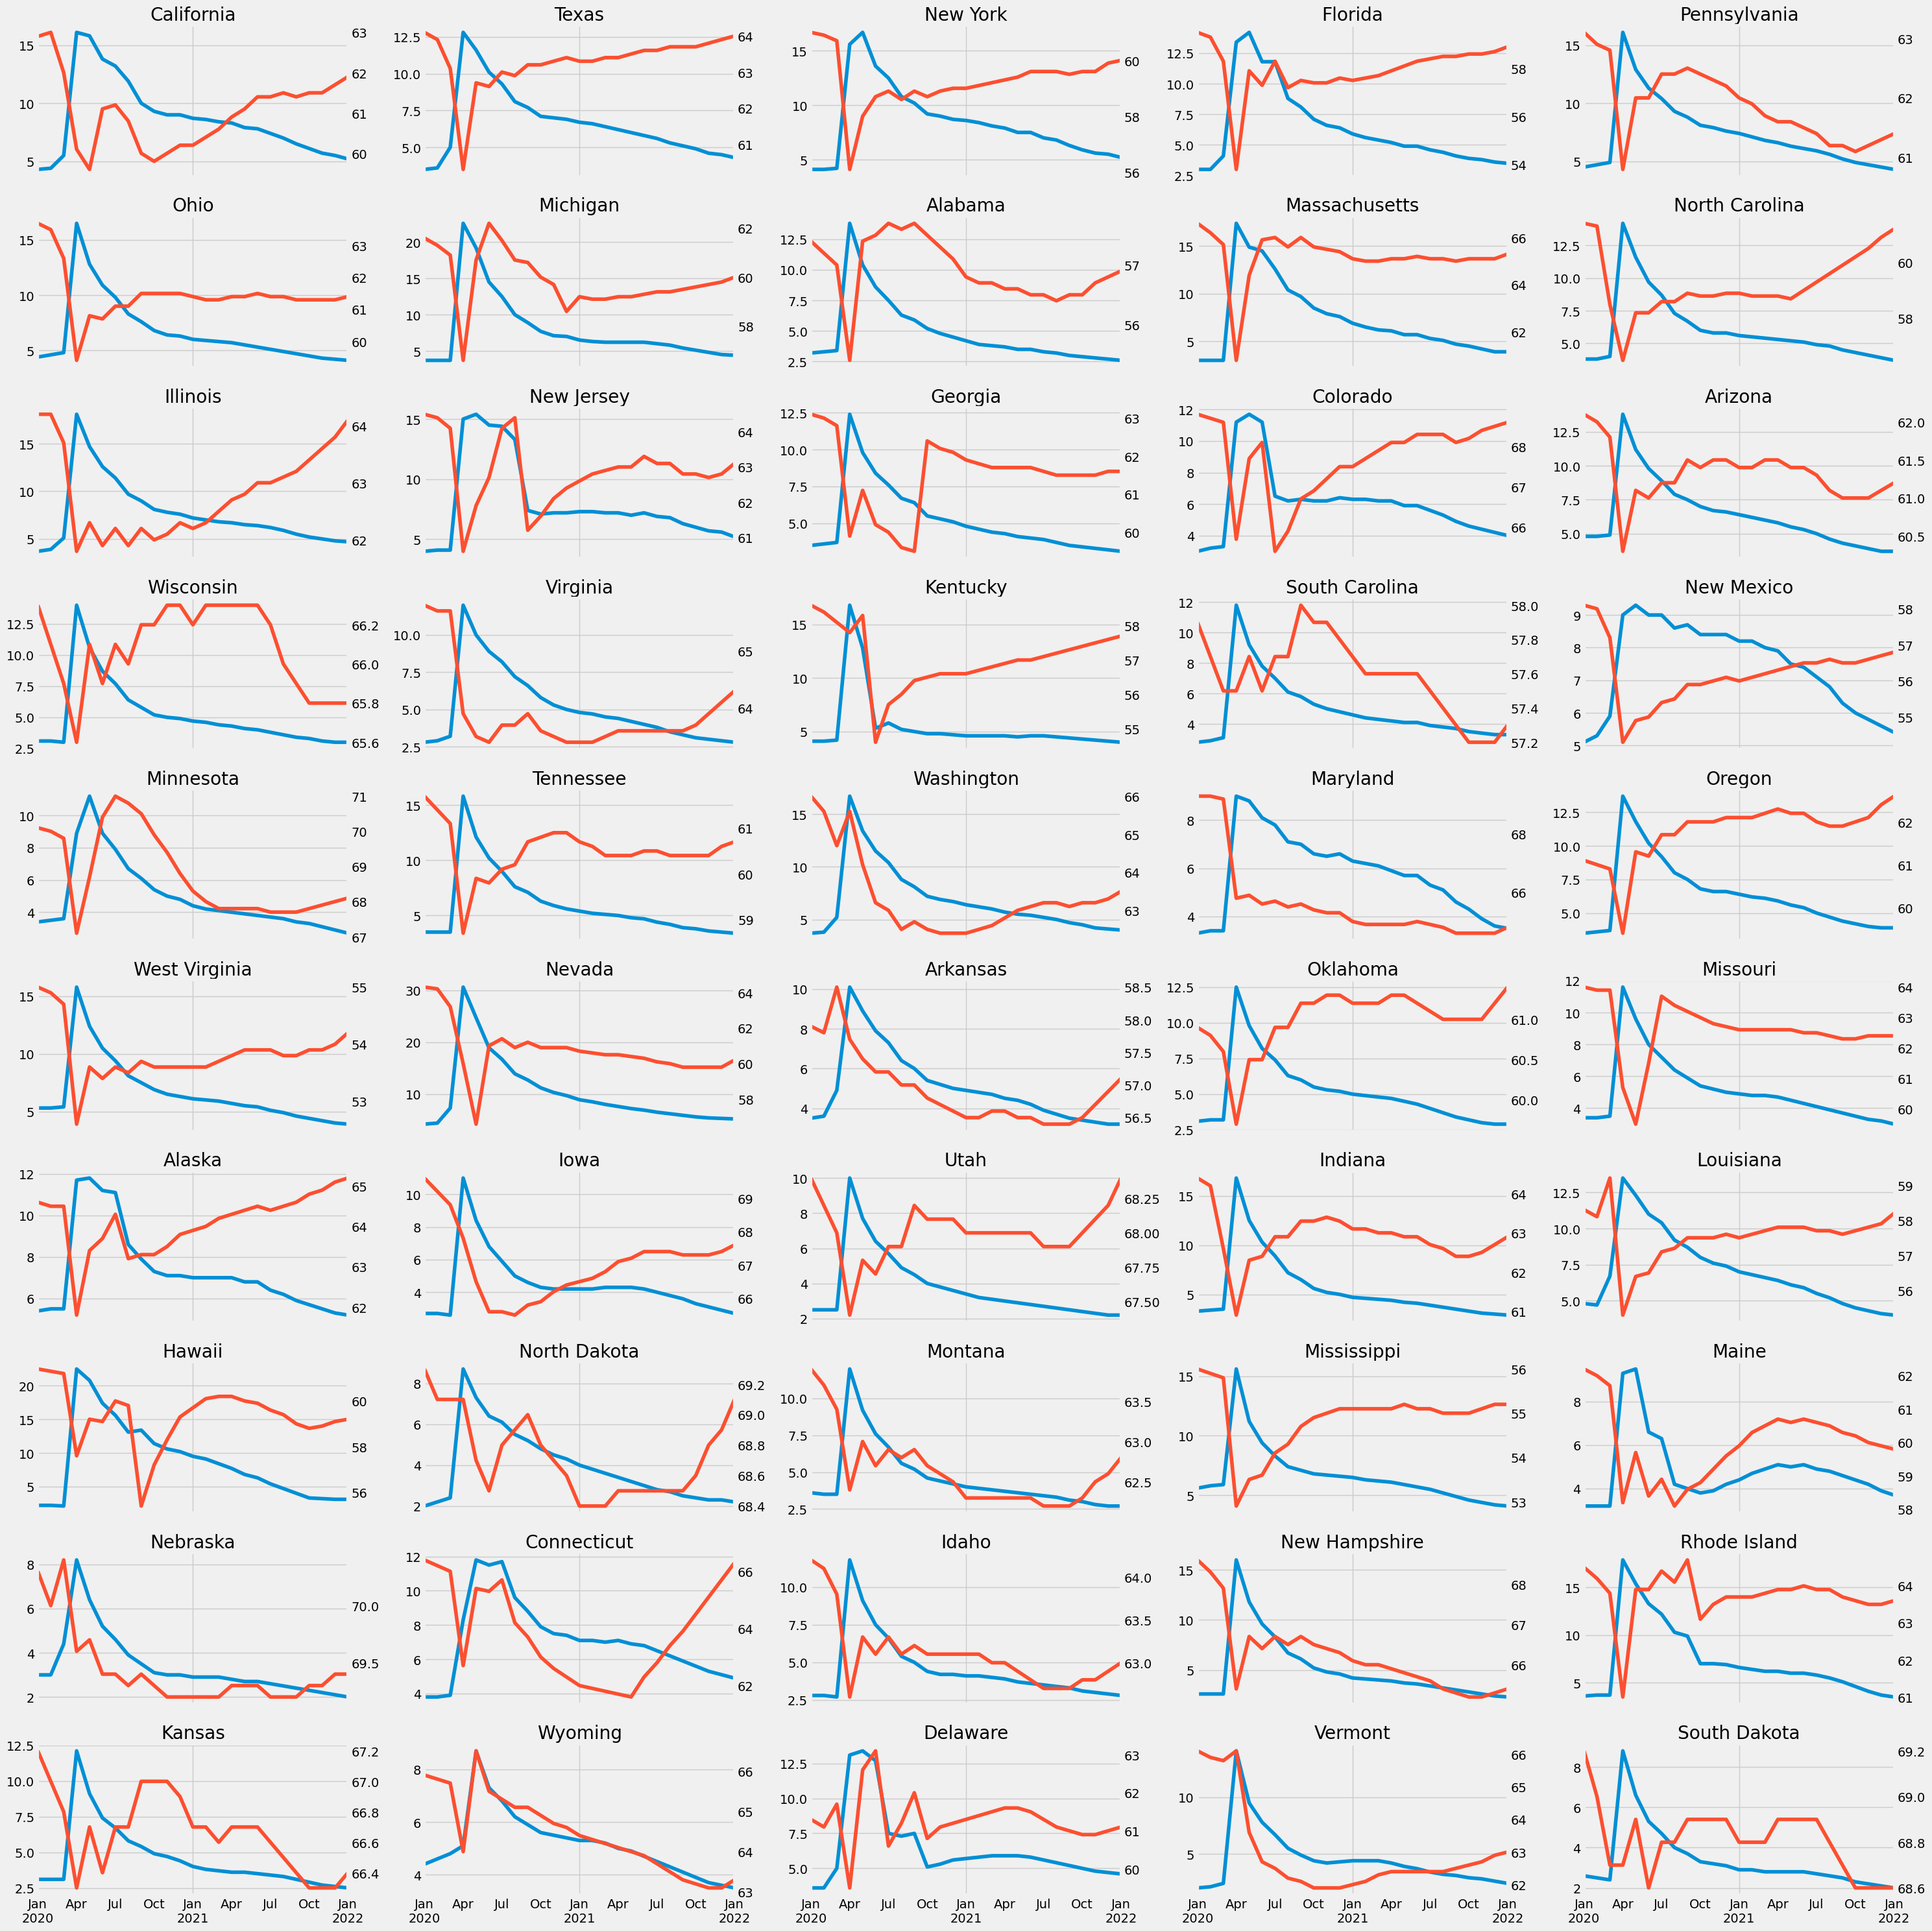

In [89]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()
i = 0
for state in unemp_results.columns:
    if state == 'District of Columbia': continue
    ax2 = axs[i].twinx()
    unemp_results.query('index >= 2020 and index <= 2022')[state].plot(ax=axs[i], label='Unemployment')
    prtcp_results.query('index >= 2020 and index <= 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

# To be continiued